<a href="https://colab.research.google.com/github/Ellen-Tuane/Analise-Cenario-Ensino-Superior/blob/main/Dados_Cota.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dados Fonte: https://www.gov.br/inep/pt-br/areas-de-atuacao/pesquisas-estatisticas-e-indicadores/censo-da-educacao-superior

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import zipfile
import plotly.express as px

In [ ]:
with zipfile.ZipFile("/content/drive/MyDrive/microdados_censo_da_educacao_superior_2020.zip") as z:
    print(*z.namelist(), sep='\n')

In [ ]:
with zipfile.ZipFile("/content/drive/MyDrive/microdados_censo_da_educacao_superior_2020.zip") as z:
    with z.open('Microdados do Censo da Educaç╞o Superior 2020/dados/MICRODADOS_CADASTRO_CURSOS_2020.CSV') as f:
        df = pd.read_csv(f, sep=';', encoding='ISO-8859-1')

In [ ]:
df_ingressantes = df.loc[:,['NU_ANO_CENSO','NO_REGIAO','NO_UF','TP_CATEGORIA_ADMINISTRATIVA','TP_REDE','QT_ING']]
print('Quantidade Total de Ingressantes no Ensino Superior 2020: ', df.QT_ING.sum())
print('Quantidade Total de Matriculados no Ensino Superior 2020: ', df.QT_MAT.sum())
print('Quantidade Total de Concluintes no Ensino Superior 2020: ', df.QT_CONC.sum())

Quantidade Total de Ingressantes no Ensino Superior 2020:  3765669
Quantidade Total de Matriculados no Ensino Superior 2020:  8680945
Quantidade Total de Concluintes no Ensino Superior 2020:  1278755


In [ ]:
df_qtd_ing_regiao = df.groupby(['NO_REGIAO']).agg(QTD_INGRESSANTES = ('QT_ING','sum'))
df_qtd_ing_regiao

,QTD_INGRESSANTES
NO_REGIAO,
Centro-Oeste,345041
Nordeste,719867
Norte,304589
Sudeste,1727141
Sul,667309


In [ ]:
qtd_ing_regiao_tp_rede = df.groupby(['NO_REGIAO','TP_REDE']).agg(QT_ING = ('QT_ING','sum')).reset_index()
qtd_ing_regiao_tp_rede

,NO_REGIAO,TP_REDE,QT_ING
0,Centro-Oeste,1,46025
1,Centro-Oeste,2,299016
2,Nordeste,1,141379
3,Nordeste,2,578488
4,Norte,1,40195
5,Norte,2,264394
6,Sudeste,1,209702
7,Sudeste,2,1517439
8,Sul,1,89824
9,Sul,2,577485


In [ ]:
df_qtd_ing_municipio= df.groupby(['CO_MUNICIPIO','NO_MUNICIPIO','TP_REDE']).agg(QTD_ING = ('QT_ING','sum')).reset_index()
df_qtd_ing_municipio

,CO_MUNICIPIO,NO_MUNICIPIO,TP_REDE,QTD_ING
0,1100015.0,Alta Floresta D'Oeste,2,153
1,1100023.0,Ariquemes,1,181
2,1100023.0,Ariquemes,2,2258
3,1100049.0,Cacoal,1,448
4,1100049.0,Cacoal,2,2721
...,...,...,...,...
3977,5221858.0,Valparaíso de Goiás,1,88
3978,5221858.0,Valparaíso de Goiás,2,5011
3979,5222005.0,Vianópolis,2,188
3980,5300108.0,Brasília,1,10362


In [ ]:
df_municipios = pd.read_csv('/content/drive/MyDrive/Analise Cota Ensino Superior/municipios.csv')
df_municipios

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,siafi_id,ddd,fuso_horario
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52,1050,62,America/Sao_Paulo
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31,4001,34,America/Sao_Paulo
2,5200100,Abadiânia,-16.19700,-48.7057,0,52,9201,62,America/Sao_Paulo
3,3100203,Abaeté,-19.15510,-45.4444,0,31,4003,37,America/Sao_Paulo
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15,401,91,America/Sao_Paulo
...,...,...,...,...,...,...,...,...,...
5565,2933604,Xique-Xique,-10.82300,-42.7245,0,29,3971,74,America/Sao_Paulo
5566,2517407,Zabelê,-8.07901,-37.1057,0,25,542,83,America/Sao_Paulo
5567,3557154,Zacarias,-21.05060,-50.0552,0,35,2973,18,America/Sao_Paulo
5568,2114007,Zé Doca,-3.27014,-45.6553,0,21,1287,98,America/Sao_Paulo


In [ ]:
df_qtd_ing_municipio_lat_long = pd.merge(df_qtd_ing_municipio, df_municipios,how='left', left_on=['CO_MUNICIPIO'],right_on=['codigo_ibge'])
df_qtd_ing_municipio_lat_long

,CO_MUNICIPIO,NO_MUNICIPIO,TP_REDE,QTD_ING,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,siafi_id,ddd,fuso_horario
0,1100015.0,Alta Floresta D'Oeste,2,153,1100015,Alta Floresta D'Oeste,-11.92830,-61.9953,0,11,33,69,America/Porto_Velho
1,1100023.0,Ariquemes,1,181,1100023,Ariquemes,-9.90571,-63.0325,0,11,7,69,America/Porto_Velho
2,1100023.0,Ariquemes,2,2258,1100023,Ariquemes,-9.90571,-63.0325,0,11,7,69,America/Porto_Velho
3,1100049.0,Cacoal,1,448,1100049,Cacoal,-11.43430,-61.4562,0,11,9,69,America/Porto_Velho
4,1100049.0,Cacoal,2,2721,1100049,Cacoal,-11.43430,-61.4562,0,11,9,69,America/Porto_Velho
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3977,5221858.0,Valparaíso de Goiás,1,88,5221858,Valparaíso de Goiás,-16.06510,-47.9757,0,52,1066,61,America/Sao_Paulo
3978,5221858.0,Valparaíso de Goiás,2,5011,5221858,Valparaíso de Goiás,-16.06510,-47.9757,0,52,1066,61,America/Sao_Paulo
3979,5222005.0,Vianópolis,2,188,5222005,Vianópolis,-16.74050,-48.5159,0,52,9641,62,America/Sao_Paulo
3980,5300108.0,Brasília,1,10362,5300108,Brasília,-15.77950,-47.9297,1,53,9701,61,America/Sao_Paulo


In [ ]:
df_ddd = df_qtd_ing_municipio_lat_long.groupby('ddd').agg(QTD_INGRESSANTES = ('QTD_ING','sum')).reset_index()
df_ddd

,ddd,QTD_INGRESSANTES
0,11,591546
1,12,53858
2,13,36352
3,14,46190
4,15,39401
...,...,...
62,95,12311
63,96,19569
64,97,6262
65,98,41952


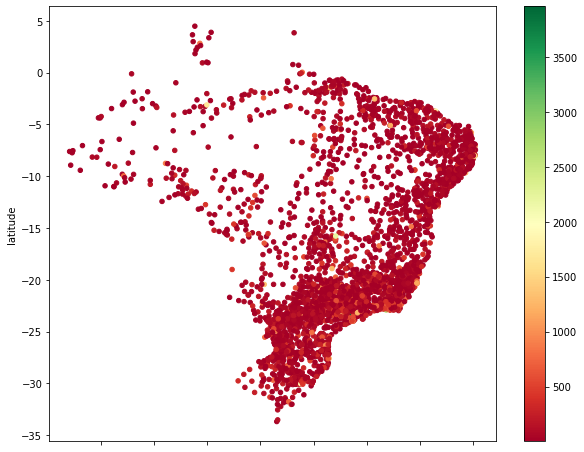

In [ ]:
df_qtd_ing_municipio_lat_long.plot.scatter( y='latitude', x='longitude', c=df_qtd_ing_municipio_lat_long['QTD_ING'], cmap='RdYlGn', figsize=(10,8))


In [ ]:
df_qtd_ing_regiao_cor = df.groupby(['NO_REGIAO']).agg(QT_ING_BRANCA = ('QT_ING_BRANCA','sum'),
                                                            QT_ING_PRETA = ('QT_ING_PRETA','sum'),
                                                            QT_ING_PARDA = ('QT_ING_PARDA', 'sum'),
                                                            QT_ING_AMARELA = ('QT_ING_AMARELA', 'sum'),
                                                            QT_ING_INDIGENA = ('QT_ING_INDIGENA', 'sum'),
                                                            QT_ING_CORND = ('QT_ING_CORND', 'sum'),
                                                            ).reset_index()
df_qtd_ing_regiao_cor

,NO_REGIAO,QT_ING_BRANCA,QT_ING_PRETA,QT_ING_PARDA,QT_ING_AMARELA,QT_ING_INDIGENA,QT_ING_CORND
0,Centro-Oeste,99336,22178,124776,7588,1805,89358
1,Nordeste,169201,58058,300328,10034,2925,179321
2,Norte,58965,14250,151901,3841,2525,73107
3,Sudeste,731103,125867,420689,23399,4640,421443
4,Sul,396584,24504,77941,5989,1567,160724


In [ ]:
df_qtd_ing_regiao_cor.iloc[1:].sum()

NO_REGIAO          NordesteNorteSudesteSul
QT_ING_BRANCA                      1355853
QT_ING_PRETA                        222679
QT_ING_PARDA                        950859
QT_ING_AMARELA                       43263
QT_ING_INDIGENA                      11657
QT_ING_CORND                        834595
dtype: object

In [ ]:
df_qtd_conc_regiao_cor = df.groupby(['NO_REGIAO']).agg(QT_CONC_BRANCA = ('QT_CONC_BRANCA','sum'),
                                                            QT_CONC_PRETA = ('QT_CONC_PRETA','sum'),
                                                            QT_CONC_PARDA = ('QT_CONC_PARDA', 'sum'),
                                                            QT_CONC_AMARELA = ('QT_CONC_AMARELA', 'sum'),
                                                            QT_CONC_INDIGENA = ('QT_CONC_INDIGENA', 'sum'),
                                                            QT_CONC_CORND = ('QT_CONC_CORND', 'sum'),
                                                            ).reset_index()
df_qtd_conc_regiao_cor

,NO_REGIAO,QT_CONC_BRANCA,QT_CONC_PRETA,QT_CONC_PARDA,QT_CONC_AMARELA,QT_CONC_INDIGENA,QT_CONC_CORND
0,Centro-Oeste,41913,9503,46390,3681,499,16032
1,Nordeste,54735,20293,104717,4590,3479,44860
2,Norte,16333,4780,47777,2063,1819,13992
3,Sudeste,311352,43539,157589,11054,2309,98311
4,Sul,161238,6091,23158,2603,297,23388


In [ ]:
df_qtd_ing_regiao_cor_tipo = df.groupby(['NO_REGIAO','TP_REDE']).agg(QT_ING_BRANCA = ('QT_ING_BRANCA','sum'),
                                                            QT_ING_PRETA = ('QT_ING_PRETA','sum'),
                                                            QT_ING_PARDA = ('QT_ING_PARDA', 'sum'),
                                                            QT_ING_AMARELA = ('QT_ING_AMARELA', 'sum'),
                                                            QT_ING_INDIGENA = ('QT_ING_INDIGENA', 'sum'),
                                                            QT_ING_CORND = ('QT_ING_CORND', 'sum'),
                                                            ).reset_index()
df_qtd_ing_regiao_cor_tipo

,NO_REGIAO,TP_REDE,QT_ING_BRANCA,QT_ING_PRETA,QT_ING_PARDA,QT_ING_AMARELA,QT_ING_INDIGENA,QT_ING_CORND
0,Centro-Oeste,1,15722,5050,18525,692,622,5414
1,Centro-Oeste,2,83614,17128,106251,6896,1183,83944
2,Nordeste,1,36111,17564,65075,1680,687,20262
3,Nordeste,2,133090,40494,235253,8354,2238,159059
4,Norte,1,7675,4207,25522,531,763,1497
5,Norte,2,51290,10043,126379,3310,1762,71610
6,Sudeste,1,102240,19978,55337,3110,459,28578
7,Sudeste,2,628863,105889,365352,20289,4181,392865
8,Sul,1,61813,4940,13672,1186,549,7664
9,Sul,2,334771,19564,64269,4803,1018,153060


In [ ]:
df_qtd_deficientes = df.groupby(['NO_REGIAO']).agg(QT_ALUNO_DEFICIENTE=('QT_ALUNO_DEFICIENTE','sum')).reset_index()
df_qtd_deficientes

,NO_REGIAO,QT_ALUNO_DEFICIENTE
0,Centro-Oeste,8030
1,Nordeste,15169
2,Norte,8844
3,Sudeste,30350
4,Sul,14246


In [ ]:
df_qtd_deficientes_detalhado = df.groupby(['NO_REGIAO']).agg(QT_ING_DEFICIENTE=('QT_ING_DEFICIENTE','sum'),
                                                   QT_MAT_DEFICIENTE =('QT_MAT_DEFICIENTE','sum'),
                                                  QT_CONC_DEFICIENTE = ('QT_CONC_DEFICIENTE','sum')).reset_index()
df_qtd_deficientes_detalhado

,NO_REGIAO,QT_ING_DEFICIENTE,QT_MAT_DEFICIENTE,QT_CONC_DEFICIENTE
0,Centro-Oeste,2171,5719,851
1,Nordeste,3779,11206,1129
2,Norte,2677,6191,708
3,Sudeste,9296,22012,3480
4,Sul,4129,10732,1434


In [ ]:
df_qtd_deficientes_detalhado_tipo = df.groupby(['NO_REGIAO','TP_REDE']).agg(QT_ING_DEFICIENTE=('QT_ING_DEFICIENTE','sum'),
                                                   QT_MAT_DEFICIENTE =('QT_MAT_DEFICIENTE','sum'),
                                                  QT_CONC_DEFICIENTE = ('QT_CONC_DEFICIENTE','sum')).reset_index()
df_qtd_deficientes_detalhado_tipo

,NO_REGIAO,TP_REDE,QT_ING_DEFICIENTE,QT_MAT_DEFICIENTE,QT_CONC_DEFICIENTE
0,Centro-Oeste,1,590,1799,110
1,Centro-Oeste,2,1581,3920,741
2,Nordeste,1,1709,6441,380
3,Nordeste,2,2070,4765,749
4,Norte,1,783,2016,116
5,Norte,2,1894,4175,592
6,Sudeste,1,1894,5841,388
7,Sudeste,2,7402,16171,3092
8,Sul,1,870,3148,267
9,Sul,2,3259,7584,1167


In [ ]:
df_qtd_ing_regiao_reserva_vagas = df.groupby(['NO_REGIAO','TP_REDE']).agg(QT_ING_RESERVA_VAGA = ('QT_ING_RESERVA_VAGA','sum'),
                                                            QT_ING_RVREDEPUBLICA = ('QT_ING_RVREDEPUBLICA','sum'),
                                                            QT_ING_RVETNICO = ('QT_ING_RVETNICO', 'sum'),
                                                            QT_ING_RVPDEF = ('QT_ING_RVPDEF', 'sum'),
                                                            QT_ING_RVSOCIAL_RF = ('QT_ING_RVSOCIAL_RF', 'sum'),
                                                            QT_ING_RVOUTROS = ('QT_ING_RVOUTROS', 'sum'),
                                                            ).reset_index()
df_qtd_ing_regiao_reserva_vagas

,NO_REGIAO,TP_REDE,QT_ING_RESERVA_VAGA,QT_ING_RVREDEPUBLICA,QT_ING_RVETNICO,QT_ING_RVPDEF,QT_ING_RVSOCIAL_RF,QT_ING_RVOUTROS
0,Centro-Oeste,1,14971,13236,7815,371,5564,407
1,Centro-Oeste,2,261,0,0,1,17,243
2,Nordeste,1,48996,45110,29184,936,18040,1320
3,Nordeste,2,488,216,2,0,4,376
4,Norte,1,13131,12561,9170,395,4940,108
5,Norte,2,27,18,3,8,1,0
6,Sudeste,1,49794,39142,23820,725,20338,911
7,Sudeste,2,156,71,11,3,93,3
8,Sul,1,27763,25558,5151,346,8517,474
9,Sul,2,15,10,3,2,4,0


In [ ]:
df_qtd_conc_regiao_reserva_vagas = df.groupby(['NO_REGIAO','TP_REDE']).agg(QT_CONC_RESERVA_VAGA = ('QT_CONC_RESERVA_VAGA','sum'),
                                                            QT_CONC_RVREDEPUBLICA = ('QT_CONC_RVREDEPUBLICA','sum'),
                                                            QT_CONC_RVETNICO = ('QT_CONC_RVETNICO', 'sum'),
                                                            QT_CONC_RVPDEF = ('QT_CONC_RVPDEF', 'sum'),
                                                            QT_CONC_RVSOCIAL_RF = ('QT_CONC_RVSOCIAL_RF', 'sum'),
                                                            QT_CONC_RVOUTROS = ('QT_CONC_RVOUTROS', 'sum'),
                                                            ).reset_index()
df_qtd_conc_regiao_reserva_vagas

,NO_REGIAO,TP_REDE,QT_CONC_RESERVA_VAGA,QT_CONC_RVREDEPUBLICA,QT_CONC_RVETNICO,QT_CONC_RVPDEF,QT_CONC_RVSOCIAL_RF,QT_CONC_RVOUTROS
0,Centro-Oeste,1,5157,4546,2771,17,1805,96
1,Centro-Oeste,2,47,1,1,1,11,33
2,Nordeste,1,13393,12359,7488,72,5266,216
3,Nordeste,2,356,50,9,0,39,306
4,Norte,1,2556,2185,1414,28,1260,5
5,Norte,2,4,3,1,0,0,0
6,Sudeste,1,16987,12988,7703,123,6055,368
7,Sudeste,2,171,12,106,0,49,12
8,Sul,1,7474,6682,1388,31,2413,145
9,Sul,2,12,9,1,1,1,0


In [ ]:
df_qtd_ing_regiao_genero = df.groupby(['NO_REGIAO']).agg( QT_ING_MASC = ('QT_ING_MASC', 'sum'),
                                                            QT_ING_FEM = ('QT_ING_FEM', 'sum'),
                                                            ).reset_index()
df_qtd_ing_regiao_genero

,NO_REGIAO,QT_ING_MASC,QT_ING_FEM
0,Centro-Oeste,148225,196816
1,Nordeste,314451,405416
2,Norte,128169,176420
3,Sudeste,746708,980433
4,Sul,280193,387116


In [ ]:
df_qtd_ing_regiao_genero.QT_ING_MASC + df_qtd_ing_regiao_genero.QT_ING_FEM

0     345041
1     719867
2     304589
3    1727141
4     667309
dtype: int64

In [ ]:
univap = df.groupby('CO_IES').agg( QT_ING_MASC = ('QT_ING_MASC', 'sum'),
                                                            QT_ING_FEM = ('QT_ING_FEM', 'sum'),
                                                            ).reset_index()
univap.loc[univap.CO_IES == 275]


,CO_IES,QT_ING_MASC,QT_ING_FEM
131,275,431,688


In [ ]:
univap = df.groupby('CO_IES').agg(QT_ING_BRANCA = ('QT_ING_BRANCA','sum'),
                                                            QT_ING_PRETA = ('QT_ING_PRETA','sum'),
                                                            QT_ING_PARDA = ('QT_ING_PARDA', 'sum'),
                                                            QT_ING_AMARELA = ('QT_ING_AMARELA', 'sum'),
                                                            QT_ING_INDIGENA = ('QT_ING_INDIGENA', 'sum'),
                                                            QT_ING_CORND = ('QT_ING_CORND', 'sum'),
                                                            ).reset_index()
univap.loc[univap.CO_IES == 275]

,CO_IES,QT_ING_BRANCA,QT_ING_PRETA,QT_ING_PARDA,QT_ING_AMARELA,QT_ING_INDIGENA,QT_ING_CORND
131,275,445,14,72,7,3,578
